In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

rfm = pd.read_csv("../data/processed/rfm_features.csv", index_col=0)

rfm.head()

,Recency,Frequency,Monetary,UniqueProducts,TotalQuantity,AvgOrderValue,Cluster
CustomerID,,,,,,,
12346.0,326,0.693147,11.253955,0.693147,11.214735,11.253955,1
12347.0,2,2.079442,8.368925,4.644391,7.807510,3.206047,1
12348.0,75,1.609438,7.494564,3.135494,7.758761,4.077122,1
12349.0,19,0.693147,7.472245,4.304065,6.448889,3.221912,2
12350.0,310,0.693147,5.815324,2.890372,5.288267,3.028712,0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Remove cluster column for scaling
X = rfm.drop("Cluster", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

rfm["PCA1"] = pca_components[:, 0]
rfm["PCA2"] = pca_components[:, 1]

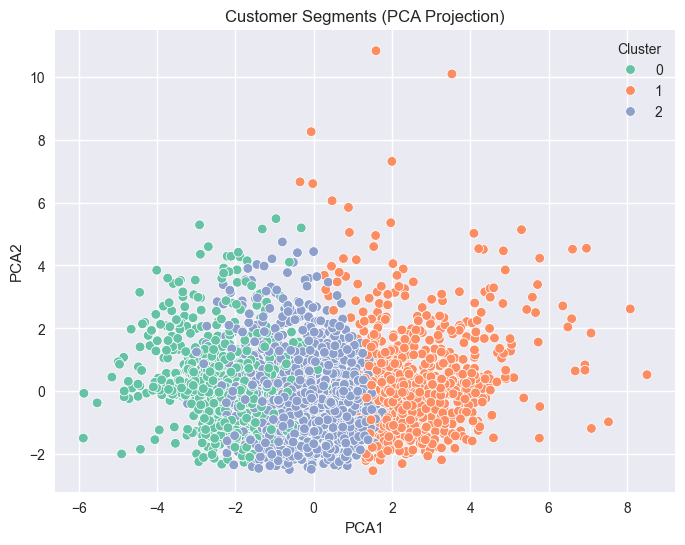

In [3]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    data=rfm,
    palette="Set2"
)

plt.title("Customer Segments (PCA Projection)")
plt.show()

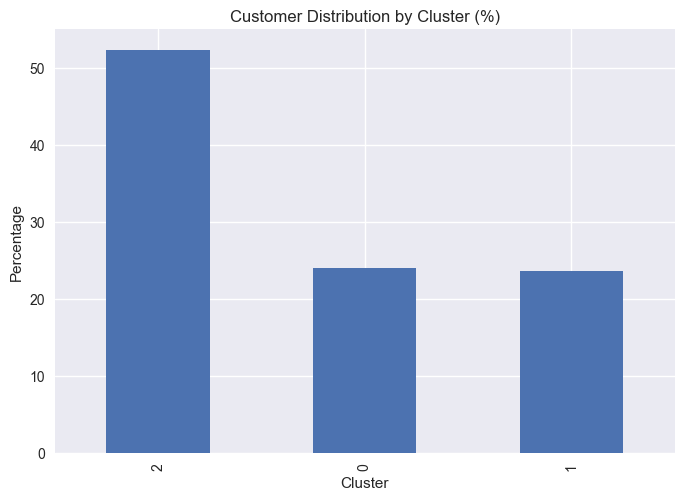

In [4]:
cluster_percent = rfm["Cluster"].value_counts(normalize=True) * 100

cluster_percent.plot(kind="bar")
plt.title("Customer Distribution by Cluster (%)")
plt.ylabel("Percentage")
plt.show()

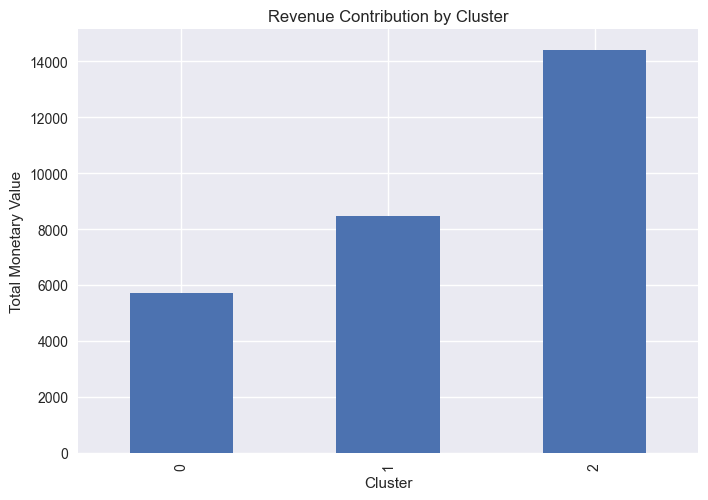

In [5]:
revenue = rfm.groupby("Cluster")["Monetary"].sum()

revenue.plot(kind="bar")
plt.title("Revenue Contribution by Cluster")
plt.ylabel("Total Monetary Value")
plt.show()

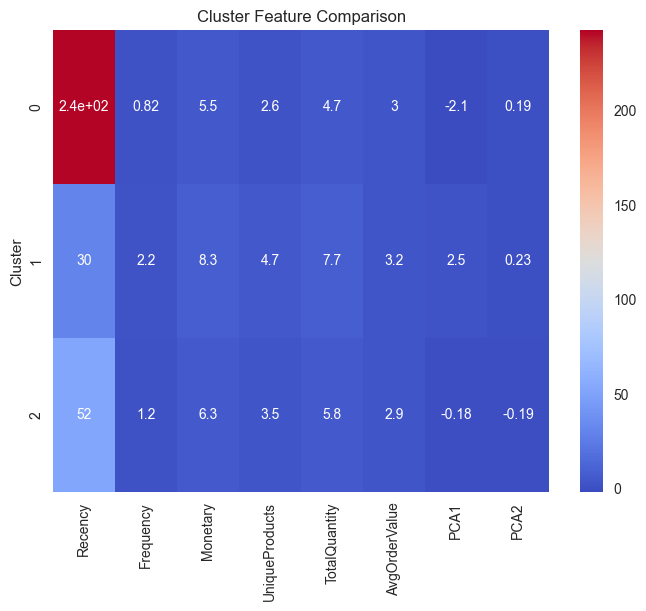

In [6]:
cluster_summary = rfm.groupby("Cluster").mean()

plt.figure(figsize=(8,6))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm")
plt.title("Cluster Feature Comparison")
plt.show()

In [8]:
# Total revenue per cluster
revenue_cluster = rfm.groupby("Cluster")["Monetary"].sum()

# Percentage contribution
revenue_percent = (revenue_cluster / revenue_cluster.sum()) * 100

revenue_percent

Cluster
0    20.017604
1    29.597691
2    50.384705
Name: Monetary, dtype: float64

In [9]:
customer_percent = rfm["Cluster"].value_counts(normalize=True) * 100
customer_percent

Cluster
2    52.351314
0    23.997234
1    23.651452
Name: proportion, dtype: float64

In [10]:
cluster_profile = rfm.groupby("Cluster").mean()
cluster_profile

,Recency,Frequency,Monetary,UniqueProducts,TotalQuantity,AvgOrderValue,PCA1,PCA2
Cluster,,,,,,,,
0,242.465898,0.820786,5.500160,2.624414,4.711374,3.024788,-2.091131,0.186752
1,30.081871,2.235672,8.251338,4.697251,7.699911,3.175406,2.523473,0.233575
2,52.026420,1.184015,6.345934,3.458957,5.796377,2.875721,-0.181513,-0.191130


In [11]:
revenue_percent.to_csv("../results/metrics/revenue_percent.csv")
cluster_profile.to_csv("../results/metrics/cluster_profile.csv")
rfm.to_csv("../results/metrics/final_clustered_customers.csv")

Cluster Interpretation & Business Insights:

Based on the clustering results and average feature values, the customer segments can be interpreted as follows:
Cluster 1 – High-Value Loyal Customers
Lowest Recency (~30 days) → Recent buyers
Highest Frequency (~2.23) → Most repeat purchases
Highest Monetary value (~8.25) → Highest spending
Strong engagement and consistent purchase behavior
These customers are the core revenue drivers of the business. They purchase frequently, spend more, and remain active.

Business Strategy:

VIP programs
Loyalty rewards
Early access to new products
Premium and personalized marketing campaigns

Cluster 2 – Moderate / Growth Segment
Medium Recency (~52 days)
Moderate Frequency (~1.18)
Medium Monetary value (~6.34)
Represents the largest share of customers
These customers are active but not yet high-value. They show potential for growth with the right engagement strategies.

Business Strategy:

Upselling and cross-selling campaigns
Product bundles and targeted promotions
Personalized email marketing
Retention-focused communication

Cluster 0 – At-Risk / Low-Value Customers
Highest Recency (~242 days) → Inactive customers
Lowest Frequency (~0.82)
Lower Monetary value (~5.50)
Weak engagement and low repeat behavior
These customers have not purchased recently and contribute less revenue. They present a high churn risk.

Business Strategy:

Reactivation campaigns
Discount incentives
Reminder emails
Controlled marketing budget allocation

Key Business Insight:

Cluster 1 is the primary revenue engine of the business.
Cluster 2 represents the biggest growth opportunity.
Cluster 0 shows churn risk and should be handled with cost-efficient reactivation strategies.
Marketing investment should prioritize retention of Cluster 1 and conversion of Cluster 2.